In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/face-mask.cnn/Face-Mask-Detection-Using-CNN")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data.npy			     model-002.model  model-008.model
Data-Preprocessing.ipynb	     model-003.model  model-009.model
dataset				     model-004.model  README.md
FaceDet.ipynb			     model-005.model  target.npy
haarcascade_frontalface_default.xml  model-006.model  Training.ipynb
model-001.model			     model-007.model  Untitled0.ipynb


In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/face-mask.cnn/Face-Mask-Detection-Using-CNN/data.npy')
target=np.load('/content/drive/MyDrive/face-mask.cnn/Face-Mask-Detection-Using-CNN/target.npy')

#loading the save numpy arrays in the previous code

# Mục mới

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 4s 135ms/step - loss: 0.0208 - accuracy: 0.9960 - val_loss: 0.2206 - val_accuracy: 0.9478
Epoch 2/20
32/32 [==============================] - 4s 133ms/step - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.2019 - val_accuracy: 0.9398
Epoch 3/20
32/32 [==============================] - 3s 84ms/step - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.2201 - val_accuracy: 0.9357
Epoch 4/20
32/32 [==============================] - 3s 85ms/step - loss: 0.0565 - accuracy: 0.9849 - val_loss: 0.2129 - val_accuracy: 0.9237
Epoch 5/20
32/32 [==============================] - 4s 134ms/step - loss: 0.0212 - accuracy: 0.9919 - val_loss: 0.1637 - val_accuracy: 0.9518
Epoch 6/20
32/32 [==============================] - 3s 83ms/step - loss: 0.0444 - accuracy: 0.9849 - val_loss: 0.4266 - val_accuracy: 0.8835
Epoch 7/20
32/32 [==============================] - 3s 83ms/step - loss: 0.0681 - accuracy: 0.9768 - val_loss: 0.2180 - val_accuracy: 0.9357
Epoch 8/20

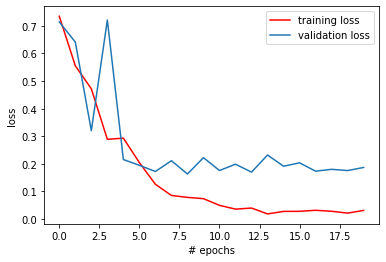

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 32ms/step - loss: 0.2791 - accuracy: 0.9420
[0.2790921628475189, 0.9420289993286133]
